Banks play crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit.

Credit scoring algorithms, which make a guess at the probability  of default,  are  the method  banks use to determine  whether  or not  a loan should be granted. This project requires us to  improve  on the state of the art in credit scoring, by predicting  the probability that somebody will experience financial distress  in the  next two years.

In this project, historical data on 150,000 borrowers id analyzed. We implemented various classification algorithms  for predicting  whether somebody  will experience  financial distress in the  next two years  by looking  on various  parameters  like monthly income, age,  number of open credit lines and loans etc.

It is commonly desired for banks to accurately  assess  the probability of default  for their  customers so that  they can manage  their  loan  risk better. With a better model, they can take calculated risk  in lending  out to customers  thus improving  the certainty  of their profit. They can tailor make  interest rate  to cover  for the level  of risk  they are exposed  from the loan. 





In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


In [337]:
add1="D:/datasets/kaggle/give_me_some_credit/cs-training.csv"
add2="D:/datasets/kaggle/give_me_some_credit/cs-test.csv"

df_train=pd.read_csv(add1, header=0, sep=',')
df_test=pd.read_csv(add2, header=0, sep=',')

In [338]:
print(df_train.shape)
print(df_test.shape)

(150000, 12)
(101503, 12)


In [339]:
df_train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [340]:
df_test.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [341]:
df_train.drop(labels='Unnamed: 0',axis=1,inplace=True)
df_test.drop(labels='Unnamed: 0',axis=1,inplace=True)

In [342]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


We plan to predict the probability and/or decision as to whether  a person will experience  financial distress ( 90 day  delinquency or worse) in the next two years. The dependent, target, variable  is SeriousDlqin2yrs and is binary, 0 or 1. 
Our initial training  dataset has 150,000  observations  and 10 variables. 

SeriousDlqin2yrs  :  1/0   whether  a person will experience  financial distress ( 90 day  delinquency or worse) in the next two years

RevolvingUtilizationOfUnsecuredLines :  Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits

age  : Age of borrower in years
                           
NumberOfTime30-59DaysPastDueNotWorse :  Number of times borrower has been 30-59 days past due but no worse in the last 2 years

DebtRatio            : Monthly debt payments, alimony,living costs divided by monthy gross income

MonthlyIncome            : Monthly income

NumberOfOpenCreditLinesAndLoans : Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)

NumberOfTimes90DaysLate   :Number of times borrower has been 90 days or more past due

NumberRealEstateLoansOrLines  :Number of mortgage and real estate loans including home equity lines of credit

NumberOfTime60-89DaysPastDueNotWorse  : Number of times borrower has been 60-89 days past due but no worse in the last 2 years

NumberOfDependents     :Number of dependents in family excluding themselves (spouse, children etc.)





In [343]:
df_train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [344]:
df_test.isnull().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [345]:
#impute null values of MonthlyIncome and NumberOfDependents features

from sklearn.ensemble import RandomForestRegressor

combined_data=pd.concat([df_train,df_test],axis=0)
combined_data.index=list(range(combined_data.shape[0]))
train=combined_data.drop(labels=['SeriousDlqin2yrs','NumberOfDependents'],axis=1)[combined_data.MonthlyIncome.notnull()]
test=combined_data.drop(labels=['SeriousDlqin2yrs','NumberOfDependents'],axis=1)[combined_data.MonthlyIncome.isnull()]
rfr=RandomForestRegressor(n_estimators=100, max_features=3, min_samples_leaf=1)
rfr.fit(train.drop('MonthlyIncome',axis=1).values, train.MonthlyIncome.values)
print(rfr.score(train.drop('MonthlyIncome',axis=1).values, train.MonthlyIncome.values))
pred_=rfr.predict(test.drop('MonthlyIncome',axis=1))
combined_data.loc[combined_data.MonthlyIncome.isnull(),'MonthlyIncome']=pred_

train=combined_data.drop(labels=['SeriousDlqin2yrs'],axis=1)[combined_data.NumberOfDependents.notnull()]
test=combined_data.drop(labels=['SeriousDlqin2yrs'],axis=1)[combined_data.NumberOfDependents.isnull()]
rfr=RandomForestRegressor(n_estimators=100, max_features=3, min_samples_leaf=1)
rfr.fit(train.drop('NumberOfDependents',axis=1).values, train.NumberOfDependents.values)
print(rfr.score(train.drop('NumberOfDependents',axis=1).values, train.NumberOfDependents.values))
pred_=rfr.predict(test.drop('NumberOfDependents',axis=1))
combined_data.loc[combined_data.NumberOfDependents.isnull(),'NumberOfDependents']=pred_.round()
combined_data['NumberOfDependents']=combined_data['NumberOfDependents'].astype(int)

0.9008045183269187
0.8845767258945075


In [346]:
combined_data.isnull().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                           0
dtype: int64

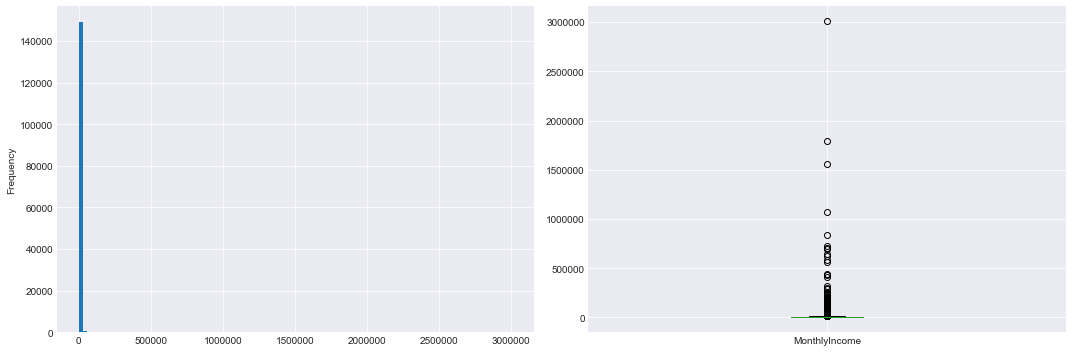

In [347]:
# MonthlyIncome feature
plt.subplots(1, 2)
plt.subplot(121)

combined_data[combined_data.SeriousDlqin2yrs.notnull()].MonthlyIncome.plot(kind='hist', bins=100,figsize=(15,5))
plt.subplot(122)

combined_data[combined_data.SeriousDlqin2yrs.notnull()].MonthlyIncome.plot(kind='box',figsize=(15,5))
plt.tight_layout()


In [348]:
#highly non-normal feature

from scipy import stats
print(stats.skew(combined_data[combined_data.SeriousDlqin2yrs.notnull()].MonthlyIncome))
print(stats.kurtosis(combined_data[combined_data.SeriousDlqin2yrs.notnull()].MonthlyIncome))

120.06431077932143
22457.972594747782


In [349]:
"""""
Tukey's Method for identfying outliers: An outlier step is calculated as 1.5 times the interquartile range (IQR). 
A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal,
i.e., a feature with >75%quantile+outlier step or <25%quantile-outlier step

"""""

def tuckey_method_for_outlier(series):
 #take pandas series and return inndices of outliers satisfying tuckey's definition

  # Calculate Q1(25th percentile of the series) and Q3 (75th percentile)

    Q1 = np.percentile(series, 25)
    Q3 = np.percentile(series, 75)
    
    step = (Q3 - Q1) * 1.5
    
    return series[(series <= Q1 - step) | (series >= Q3 + step)].index

In [350]:
tuckey_method_for_outlier(combined_data.loc[combined_data.SeriousDlqin2yrs.notnull(),'MonthlyIncome'])

Int64Index([     4,      9,     45,    127,    196,    212,    266,    274,
               282,    285,
            ...
            149738, 149764, 149830, 149831, 149839, 149861, 149893, 149906,
            149944, 149966],
           dtype='int64', length=4750)

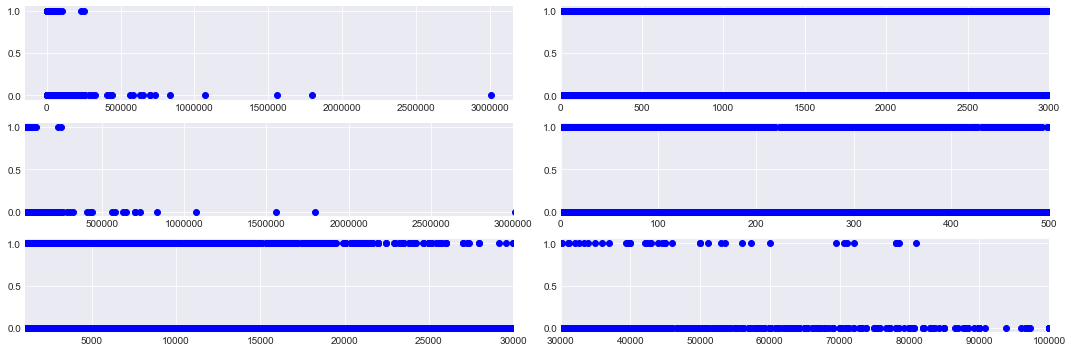

In [351]:
"""""
It is unreasonable to consider these indices as abnormal
We first examine the relationship between MonthlyIncome and SeriousDlqin2yrs and then split data into appropriate
parts according to MonthlyIncome. This also means a new categorical feature

"""""
plt.subplots(2, 2,figsize=(15,5))

plt.subplot(321)
plt.plot(combined_data[combined_data.SeriousDlqin2yrs.notnull()].MonthlyIncome, combined_data[combined_data.SeriousDlqin2yrs.notnull()].SeriousDlqin2yrs, 'bo')

plt.subplot(322)

plt.plot(combined_data[combined_data.SeriousDlqin2yrs.notnull()].MonthlyIncome, combined_data[combined_data.SeriousDlqin2yrs.notnull()].SeriousDlqin2yrs, 'bo')
plt.xlim((0,3000))

plt.subplot(323)

plt.plot(combined_data[combined_data.SeriousDlqin2yrs.notnull()].MonthlyIncome, combined_data[combined_data.SeriousDlqin2yrs.notnull()].SeriousDlqin2yrs, 'bo')
plt.xlim((30000,3000000))

plt.subplot(324)

plt.plot(combined_data[combined_data.SeriousDlqin2yrs.notnull()].MonthlyIncome, combined_data[combined_data.SeriousDlqin2yrs.notnull()].SeriousDlqin2yrs, 'bo')
plt.xlim((0,500))

plt.subplot(325)

plt.plot(combined_data[combined_data.SeriousDlqin2yrs.notnull()].MonthlyIncome, combined_data[combined_data.SeriousDlqin2yrs.notnull()].SeriousDlqin2yrs, 'bo')
plt.xlim((1000,30000))

plt.subplot(326)

plt.plot(combined_data[combined_data.SeriousDlqin2yrs.notnull()].MonthlyIncome, combined_data[combined_data.SeriousDlqin2yrs.notnull()].SeriousDlqin2yrs, 'bo')
plt.xlim((30000,100000))

plt.tight_layout()



In [352]:
# split the range of MonthlyIncome into small intervals, say of length $500, count 
# the people fall into these intervals and calculate default rates of each interval

default_rates=[]
interval_populations=[]
for i in range(400):
    interval_populations.append(combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull()) & (combined_data.MonthlyIncome>(i*500))&(combined_data.MonthlyIncome<((i+1)*500))].shape[0])
    default_rates.append(combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull()) & (combined_data.MonthlyIncome>(i*500))&(combined_data.MonthlyIncome<((i+1)*500))].sum()['SeriousDlqin2yrs']/combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull()) & (combined_data.MonthlyIncome>(i*500))&(combined_data.MonthlyIncome<((i+1)*500))].shape[0])
    
    


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


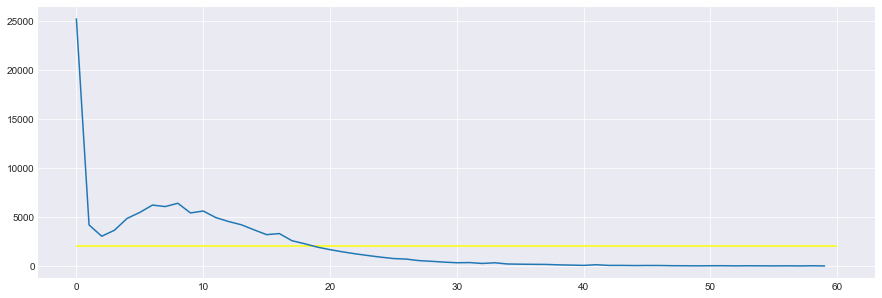

In [353]:
plt.figure(figsize=(15,5))
plt.plot(list(range(60)),interval_populations[:60])    
plt.hlines(y=2000,xmin=0,xmax=60,colors='yellow')

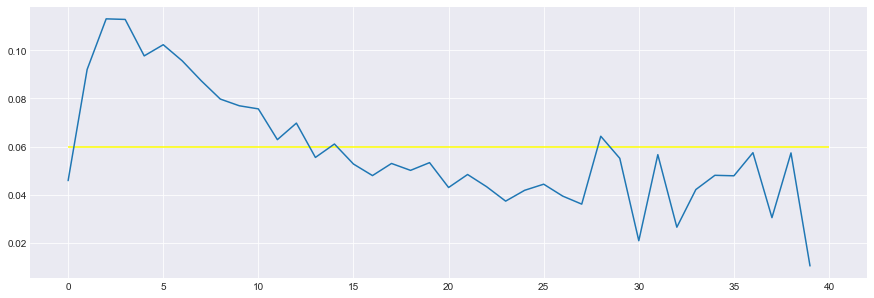

In [354]:
plt.figure(figsize=(15,5))
plt.plot(list(range(40)),default_rates[:40])    
plt.hlines(y=0.06,xmin=0,xmax=40,colors='yellow')
    

In [355]:
# Divide data into 4 subgroups: <=$500, $500< <$6000, $6000< <$25000, >$25000
# default rates for these groups

print(combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull()) & (combined_data.MonthlyIncome<=500)].sum()['SeriousDlqin2yrs']/combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull()) & (combined_data.MonthlyIncome<=500)].shape[0])
print(combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull()) & (combined_data.MonthlyIncome>500)&(combined_data.MonthlyIncome<=6000)].sum()['SeriousDlqin2yrs']/combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull()) & (combined_data.MonthlyIncome>500)&(combined_data.MonthlyIncome<=6000)].shape[0])
print(combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull()) & (combined_data.MonthlyIncome>6000)&(combined_data.MonthlyIncome<=25000)].sum()['SeriousDlqin2yrs']/combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull()) & (combined_data.MonthlyIncome>6000)&(combined_data.MonthlyIncome<=25000)].shape[0])
print(combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull()) & (combined_data.MonthlyIncome>25000)].sum()['SeriousDlqin2yrs']/combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull()) & (combined_data.MonthlyIncome>25000)].shape[0])



0.045542061611374404
0.08614253156415598
0.05116630540696403
0.052364864864864864


In [356]:
combined_data['income_groups']=combined_data.MonthlyIncome.apply(lambda u:1 if u<=500 else (2 if u<=6000 else (3 if u<=25000 else 4)))
combined_data['income_groups']=combined_data['income_groups'].astype('category')

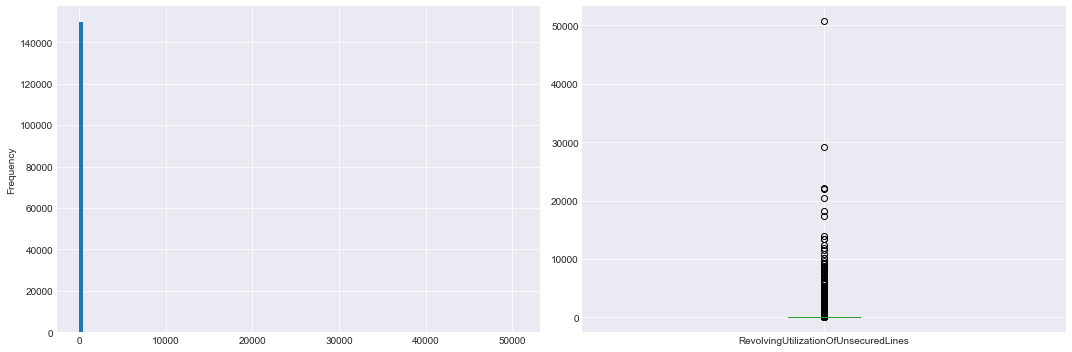

In [357]:
# RevolvingUtilizationOfUnsecuredLines feature
plt.subplots(1, 2)
plt.subplot(121)

combined_data[combined_data.SeriousDlqin2yrs.notnull()].RevolvingUtilizationOfUnsecuredLines.plot(kind='hist', bins=100,figsize=(15,5))
plt.subplot(122)

combined_data[combined_data.SeriousDlqin2yrs.notnull()].RevolvingUtilizationOfUnsecuredLines.plot(kind='box',figsize=(15,5))
plt.tight_layout()

In [358]:
#we follow  almost the  same steps  seen in the MonthlyIncome case.

default_rates=[]
interval_populations=[]

step=0.2
for i in range(100):
    interval_populations.append(combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull()) & (combined_data.RevolvingUtilizationOfUnsecuredLines>=(i*step))&(combined_data.RevolvingUtilizationOfUnsecuredLines<((i+1)*step))].shape[0])
    default_rates.append(combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull()) & (combined_data.RevolvingUtilizationOfUnsecuredLines>(i*step))&(combined_data.RevolvingUtilizationOfUnsecuredLines<((i+1)*step))].sum()['SeriousDlqin2yrs']/combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull()) & (combined_data.RevolvingUtilizationOfUnsecuredLines>=(i*step))&(combined_data.RevolvingUtilizationOfUnsecuredLines<((i+1)*step))].shape[0])
 

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


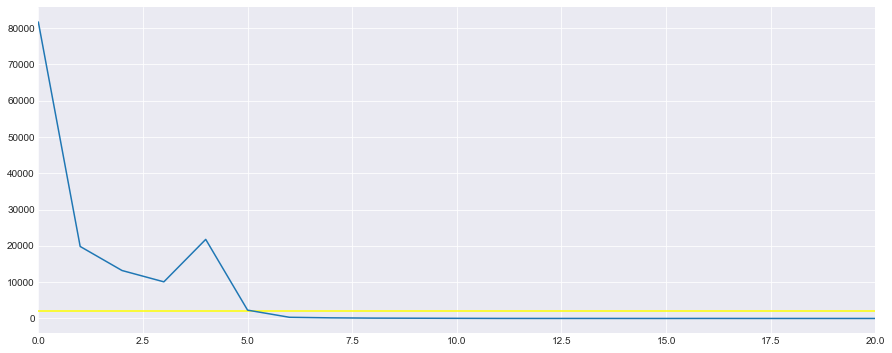

In [359]:
plt.figure(figsize=(15,6))
plt.plot(range(100), interval_populations)
plt.xlim((0,20))
plt.hlines(y=2000,xmin=0,xmax=20, colors='yellow')



(0, 1)

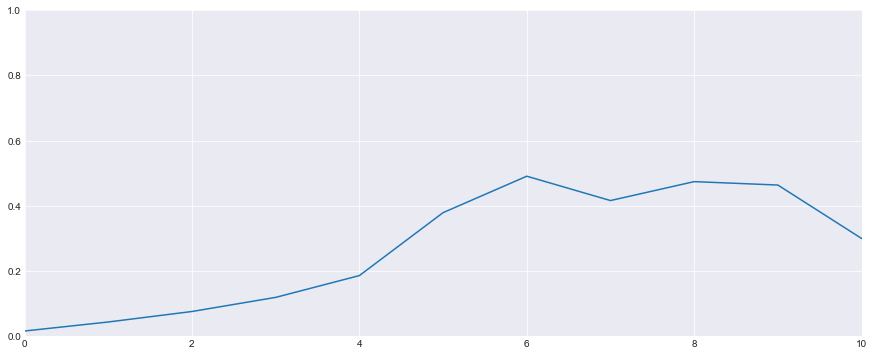

In [360]:
plt.figure(figsize=(15,6))
plt.plot(range(100), default_rates)
plt.xlim((0,10))
plt.ylim((0,1))

In [361]:
combined_data['debt_to_limit_ratio_groups']=combined_data.RevolvingUtilizationOfUnsecuredLines.apply(lambda u:1 if u<=0.8 else (2 if u<=1.2 else (3 if u<=1.8 else 4)))
combined_data['debt_to_limit_ratio_groups']=combined_data['debt_to_limit_ratio_groups'].astype('category')

In [362]:
#age feature

combined_data.loc[combined_data.SeriousDlqin2yrs.notnull(),'age'].describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

In [363]:
combined_data.loc[combined_data.SeriousDlqin2yrs.isnull(),'age'].describe()

count    101503.000000
mean         52.405436
std          14.779756
min          21.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         104.000000
Name: age, dtype: float64

In [364]:
combined_data.loc[combined_data.SeriousDlqin2yrs.notnull(),'age'].value_counts().sort_index()

0         1
21      183
22      434
23      641
24      816
25      953
26     1193
27     1338
28     1560
29     1702
30     1937
31     2038
32     2050
33     2239
34     2155
35     2246
36     2379
37     2521
38     2631
39     2987
40     3093
41     3122
42     3082
43     3208
44     3294
45     3502
46     3714
47     3719
48     3806
49     3837
       ... 
76     1183
77     1099
78     1054
79      981
80      876
81      774
82      647
83      512
84      480
85      483
86      407
87      357
88      313
89      276
90      198
91      154
92       93
93       87
94       47
95       45
96       18
97       17
98        6
99        9
101       3
102       3
103       3
105       1
107       1
109       2
Name: age, Length: 86, dtype: int64

In [365]:
#delete row with zero age 

combined_data=combined_data.drop(labels=combined_data[combined_data.age==0].index, axis=0)


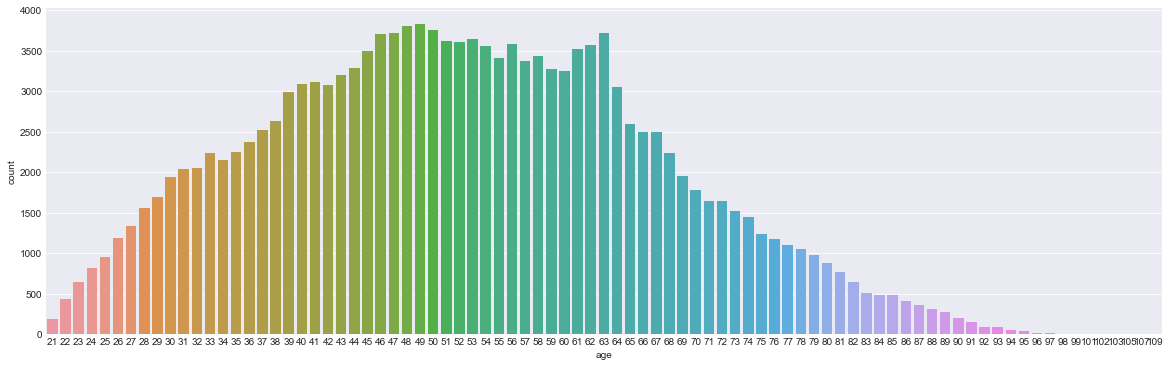

In [366]:
plt.figure(figsize=(20,6))
sns.countplot(x='age', data=combined_data[combined_data.SeriousDlqin2yrs.notnull()])

In [367]:
combined_data.loc[combined_data.SeriousDlqin2yrs.notnull(),'age'].value_counts()[combined_data.loc[combined_data.SeriousDlqin2yrs.notnull(),'age'].value_counts()<100]
#each age group has at least one hundred people, except 92,93,94,95,96,....

92     93
93     87
94     47
95     45
96     18
97     17
99      9
98      6
101     3
102     3
103     3
109     2
107     1
105     1
Name: age, dtype: int64

In [368]:
#calculate default rate of each age group

default_rates=list()

for age in combined_data[combined_data.SeriousDlqin2yrs.notnull()].age.value_counts().sort_index().index:
    
    default_rates.append(combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull())&(combined_data.age==age),'SeriousDlqin2yrs'].sum()/combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull())&(combined_data.age==age)].shape[0])

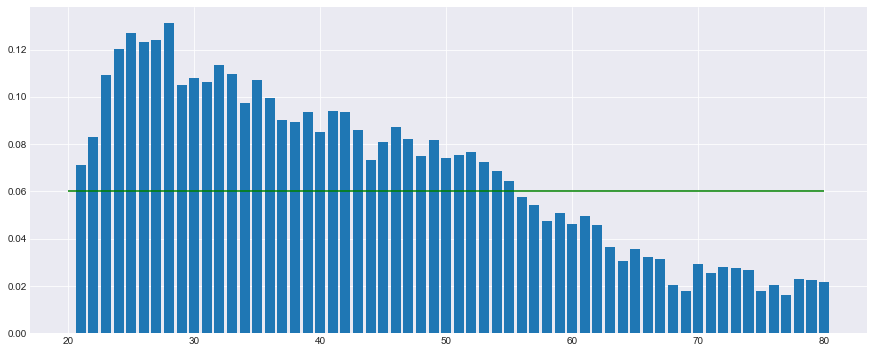

In [369]:
plt.figure(figsize=(15,6))
plt.bar(combined_data[combined_data.SeriousDlqin2yrs.notnull()].age.value_counts().sort_index().index[:60],default_rates[:60])
plt.hlines(y=0.06,colors='green',xmin=20,xmax=80)


In [370]:
# Divide data into 5 subgroups: <=28, 28< <=35, 35< <=55, 55< <=80, >80
# default rates for these groups

print(combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull())&(combined_data.age<=28),'SeriousDlqin2yrs'].sum()/combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull())&(combined_data.age<=28)].shape[0])
print(combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull())&(combined_data.age>28)&(combined_data.age<=35),'SeriousDlqin2yrs'].sum()/combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull())&(combined_data.age>28)&(combined_data.age<=35)].shape[0])
print(combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull())&(combined_data.age>35)&(combined_data.age<=55),'SeriousDlqin2yrs'].sum()/combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull())&(combined_data.age>35)&(combined_data.age<=55)].shape[0])
print(combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull())&(combined_data.age>55)&(combined_data.age<=80),'SeriousDlqin2yrs'].sum()/combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull())&(combined_data.age>55)&(combined_data.age<=80)].shape[0])
print(combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull())&(combined_data.age>80),'SeriousDlqin2yrs'].sum()/combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull())&(combined_data.age>80)].shape[0])


0.1202584995785333
0.10684206862949816
0.08140251695259289
0.03716553645586921
0.02025931928687196


In [371]:
combined_data['age_groups']=combined_data.age.apply(lambda u:1 if u<=28 else (2 if u<=35 else (3 if u<=55 else (4 if u<=80 else 5))))
combined_data['age_groups']=combined_data['age_groups'].astype('category')

In [372]:
#DeptRatio

#skewness and kurtosis
print(stats.skew(combined_data.loc[combined_data.SeriousDlqin2yrs.notnull(),'DebtRatio']))
print(stats.kurtosis(combined_data.loc[combined_data.SeriousDlqin2yrs.notnull(),'DebtRatio']))

95.15654915311828
13733.744477535229


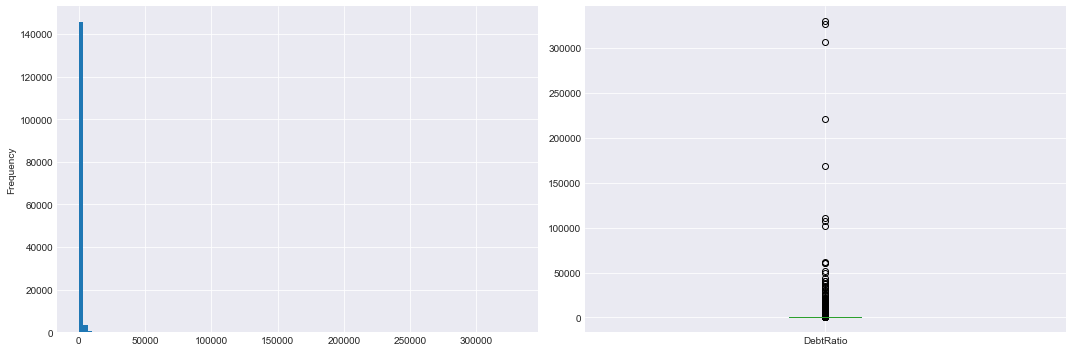

In [373]:
plt.subplots(1, 2)
plt.subplot(121)

combined_data[combined_data.SeriousDlqin2yrs.notnull()].DebtRatio.plot(kind='hist', bins=100,figsize=(15,5))
plt.subplot(122)

combined_data[combined_data.SeriousDlqin2yrs.notnull()].DebtRatio.plot(kind='box',figsize=(15,5))
plt.tight_layout()

In [374]:
combined_data.loc[combined_data.SeriousDlqin2yrs.notnull(),'DebtRatio'].describe()

count    149999.000000
mean        353.007426
std        2037.825113
min           0.000000
25%           0.175074
50%           0.366503
75%           0.868257
max      329664.000000
Name: DebtRatio, dtype: float64

In [375]:
#basic statistics of DebtRatio is very familiar to RevolvingUtilizationOfUnsecuredLines

default_rates=[]
interval_populations=[]

step=0.3
for i in range(100):
    interval_populations.append(combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull()) & (combined_data.DebtRatio>=(i*step))&(combined_data.DebtRatio<((i+1)*step))].shape[0])
    default_rates.append(combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull()) & (combined_data.DebtRatio>(i*step))&(combined_data.DebtRatio<((i+1)*step))].sum()['SeriousDlqin2yrs']/combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull()) & (combined_data.DebtRatio>=(i*step))&(combined_data.DebtRatio<((i+1)*step))].shape[0])
 

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


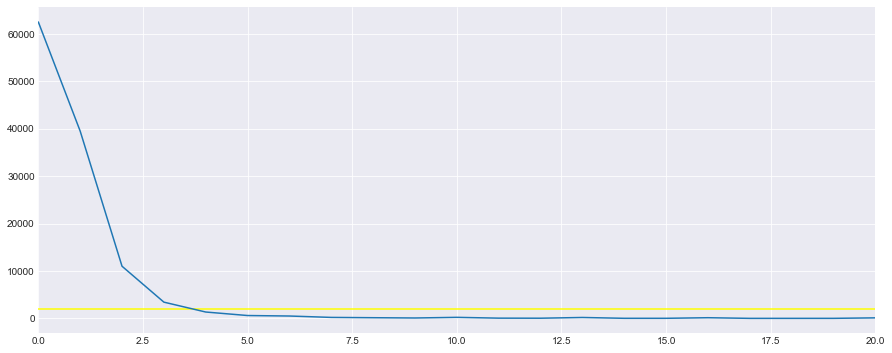

In [376]:
plt.figure(figsize=(15,6))
plt.plot(range(100), interval_populations)
plt.xlim((0,20))
plt.hlines(y=2000,xmin=0,xmax=20, colors='yellow')

(0, 0.2)

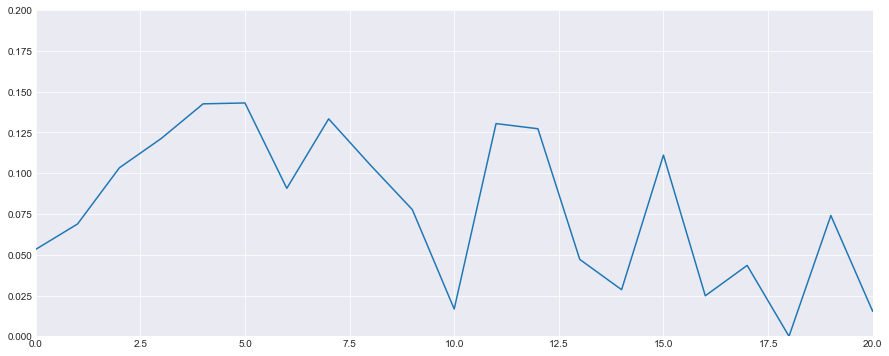

In [377]:
plt.figure(figsize=(15,6))
plt.plot(range(100), default_rates)
plt.xlim((0,20))
plt.ylim((0,0.2))

In [378]:
print(combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull()) & (combined_data.DebtRatio<0.5)].sum()['SeriousDlqin2yrs']/combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull()) & (combined_data.DebtRatio<0.5)].shape[0])


0.06035154374019488


In [379]:
print(combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull()) & (combined_data.DebtRatio>0.5)&(combined_data.DebtRatio<=1.7)].sum()['SeriousDlqin2yrs']/combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull()) & (combined_data.DebtRatio>0.5)&(combined_data.DebtRatio<=1.7)].shape[0])


0.10386874620214705


In [380]:
print(combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull()) & (combined_data.DebtRatio>1.7)].sum()['SeriousDlqin2yrs']/combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull()) & (combined_data.DebtRatio>1.7)].shape[0])


0.05717087986838359


In [381]:

combined_data['DebtRatio_groups']=combined_data.DebtRatio.apply(lambda u:1 if (u>=0.5 and u<=1.7) else 0)
combined_data['DebtRatio_groups']=combined_data['DebtRatio_groups'].astype('category')

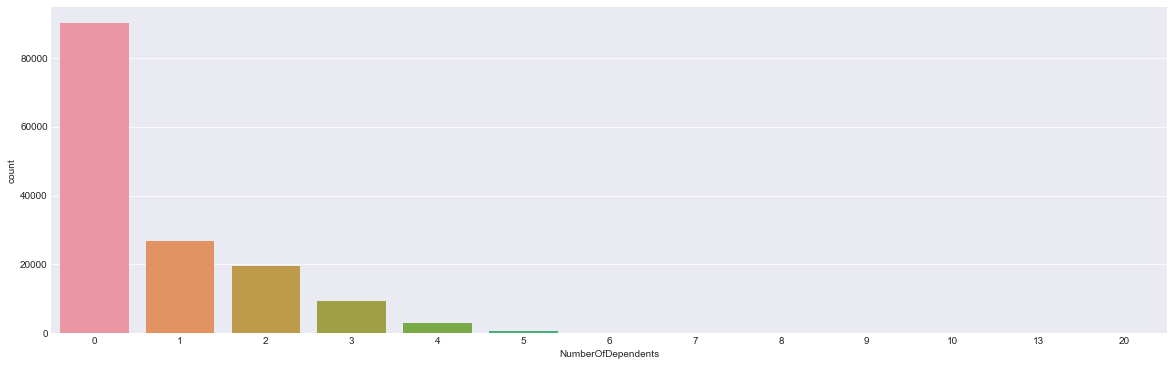

In [382]:
#        NumberOfDependents

plt.figure(figsize=(20,6))
sns.countplot(x='NumberOfDependents', data=combined_data[combined_data.SeriousDlqin2yrs.notnull()])


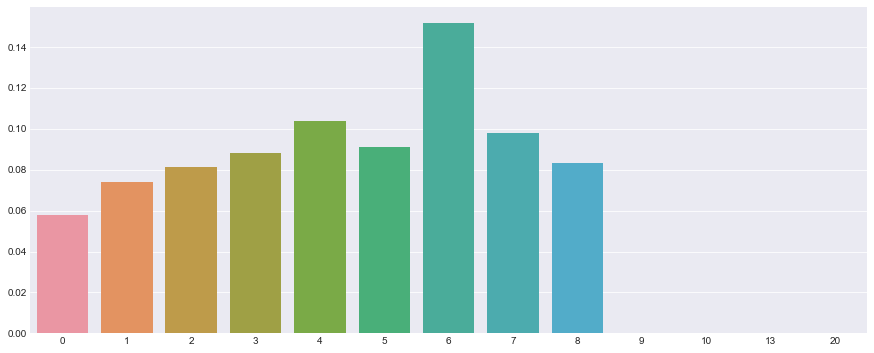

In [383]:
#calculate default rate of each age group

default_rates=list()

for num in combined_data.loc[combined_data.SeriousDlqin2yrs.notnull()].NumberOfDependents.value_counts().sort_index().index:
    
    default_rates.append(combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull())&(combined_data.NumberOfDependents==num),'SeriousDlqin2yrs'].sum()/combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull())&(combined_data.NumberOfDependents==num)].shape[0])
    
    
plt.figure(figsize=(15,6))
sns.barplot(combined_data.loc[combined_data.SeriousDlqin2yrs.notnull()].NumberOfDependents.value_counts().sort_index().index,default_rates)


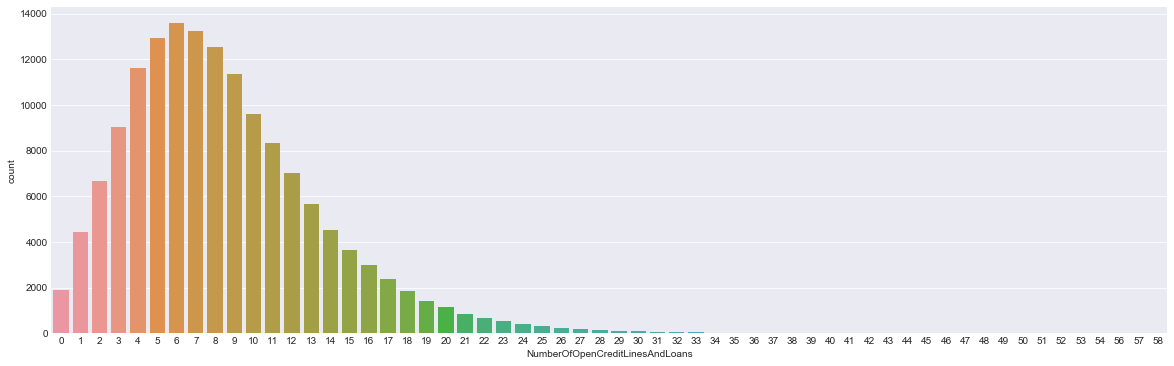

In [384]:
# no subgroup comes from NumberOfDependents feature

#NumberOfOpenCreditLinesAndLoans

plt.figure(figsize=(20,6))
sns.countplot(x='NumberOfOpenCreditLinesAndLoans', data=combined_data[combined_data.SeriousDlqin2yrs.notnull()])


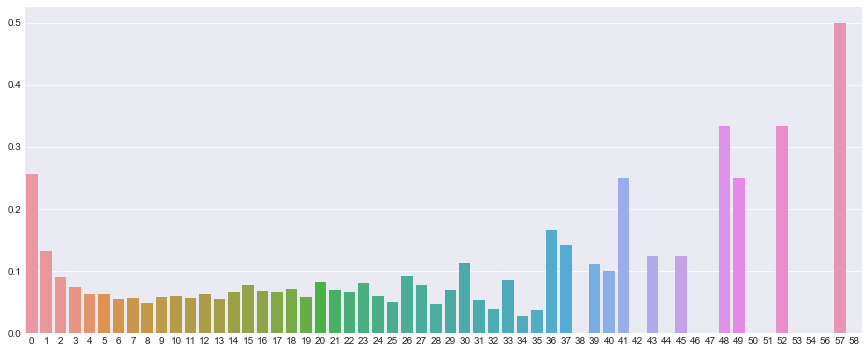

In [385]:

default_rates=list()

for num in combined_data.loc[combined_data.SeriousDlqin2yrs.notnull()].NumberOfOpenCreditLinesAndLoans.value_counts().sort_index().index:
    
    default_rates.append(combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull())&(combined_data.NumberOfOpenCreditLinesAndLoans==num),'SeriousDlqin2yrs'].sum()/combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull())&(combined_data.NumberOfOpenCreditLinesAndLoans==num)].shape[0])
    
    
plt.figure(figsize=(15,6))
sns.barplot(combined_data.loc[combined_data.SeriousDlqin2yrs.notnull()].NumberOfOpenCreditLinesAndLoans.value_counts().sort_index().index,default_rates)


In [386]:
print(combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull()) & (combined_data.NumberOfOpenCreditLinesAndLoans>=4)&(combined_data.NumberOfOpenCreditLinesAndLoans<=24)].sum()['SeriousDlqin2yrs']/combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull()) & (combined_data.NumberOfOpenCreditLinesAndLoans>=4)&(combined_data.NumberOfOpenCreditLinesAndLoans<=24)].shape[0])
print(combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull()) & (combined_data.NumberOfOpenCreditLinesAndLoans<=3)].sum()['SeriousDlqin2yrs']/combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull()) & (combined_data.NumberOfOpenCreditLinesAndLoans<=3)].shape[0])
print(combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull()) & (combined_data.NumberOfOpenCreditLinesAndLoans>24)].sum()['SeriousDlqin2yrs']/combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull()) & (combined_data.NumberOfOpenCreditLinesAndLoans>24)].shape[0])



0.05978351110513706
0.10702947845804989
0.07113821138211382


In [387]:

combined_data['NumberOfCreditLines_groups']=combined_data.NumberOfOpenCreditLinesAndLoans.apply(lambda u:1 if u<4 else (2 if u<=24 else 3))
combined_data['NumberOfCreditLines_groups']=combined_data['NumberOfCreditLines_groups'].astype('category')

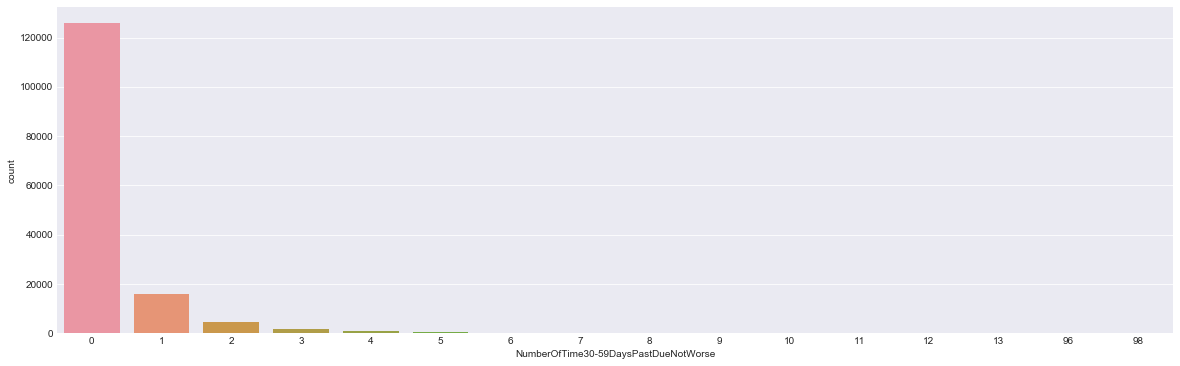

In [388]:

#NumberOfTime30-59DaysPastDueNotWorse

plt.figure(figsize=(20,6))
sns.countplot(x='NumberOfTime30-59DaysPastDueNotWorse', data=combined_data[combined_data.SeriousDlqin2yrs.notnull()])


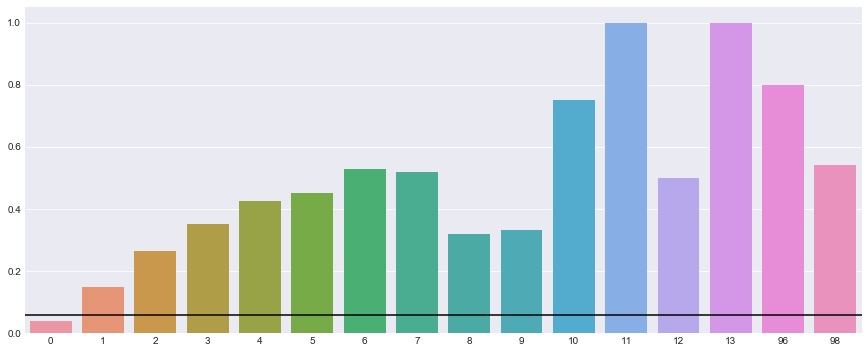

In [389]:

default_rates=list()

for num in combined_data.loc[combined_data.SeriousDlqin2yrs.notnull(),'NumberOfTime30-59DaysPastDueNotWorse'].value_counts().sort_index().index:
    
    default_rates.append(combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull())&(combined_data['NumberOfTime30-59DaysPastDueNotWorse']==num),'SeriousDlqin2yrs'].sum()/combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull())&(combined_data['NumberOfTime30-59DaysPastDueNotWorse']==num)].shape[0])
    
    
plt.figure(figsize=(15,6))
sns.barplot(combined_data.loc[combined_data.SeriousDlqin2yrs.notnull(),'NumberOfTime30-59DaysPastDueNotWorse'].value_counts().sort_index().index,default_rates)
plt.hlines(y=0.06, xmin=-1,xmax=20)

In [390]:
#the above two plots suggest two subgroups:

combined_data['30-59DaysPastDue_groups']=combined_data['NumberOfTime30-59DaysPastDueNotWorse'].apply(lambda u:0 if u==0 else 1)
combined_data['30-59DaysPastDue_groups']=combined_data['30-59DaysPastDue_groups'].astype('category')

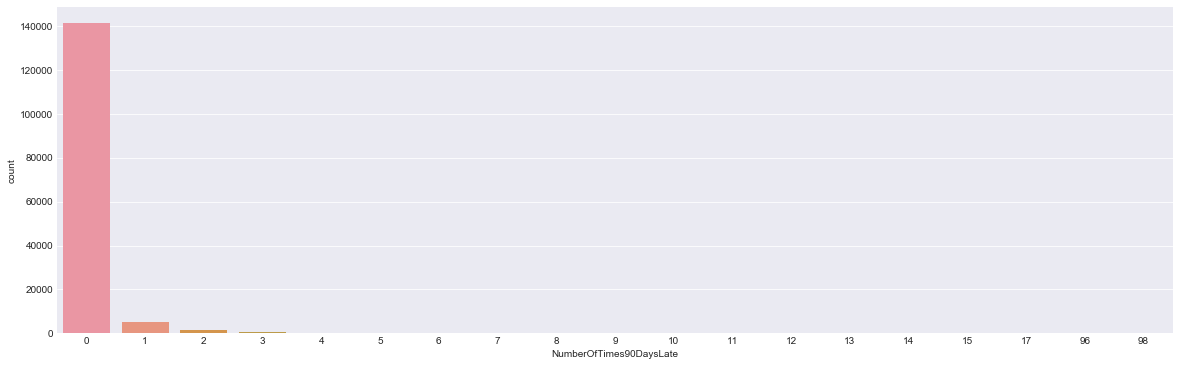

In [391]:

#NumberOfTimes90DaysLate

plt.figure(figsize=(20,6))
sns.countplot(x='NumberOfTimes90DaysLate', data=combined_data[combined_data.SeriousDlqin2yrs.notnull()])

In [392]:
combined_data.loc[combined_data.SeriousDlqin2yrs.notnull(),'NumberOfTimes90DaysLate'].value_counts()

0     141661
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
11         5
96         5
13         4
12         2
14         2
15         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [393]:
combined_data.loc[combined_data.SeriousDlqin2yrs.isnull(),'NumberOfTimes90DaysLate'].value_counts()

0     95785
1      3594
2      1062
3       445
98      213
4       191
5       102
6        44
7        26
8        19
9        14
10        2
12        1
11        1
96        1
16        1
17        1
18        1
Name: NumberOfTimes90DaysLate, dtype: int64

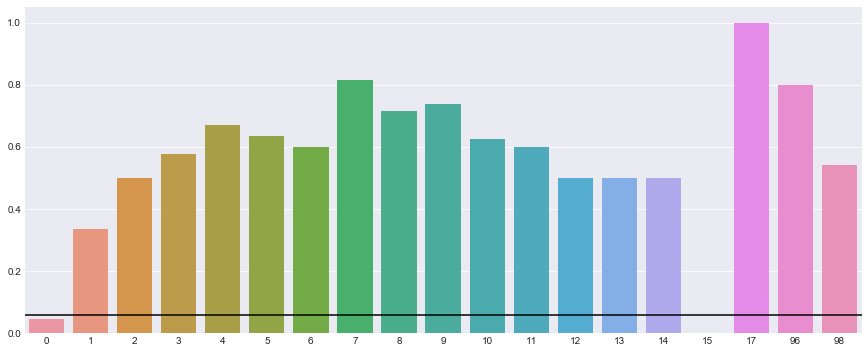

In [394]:

default_rates=list()

for num in combined_data.loc[combined_data.SeriousDlqin2yrs.notnull(),'NumberOfTimes90DaysLate'].value_counts().sort_index().index:
    
    default_rates.append(combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull())&(combined_data['NumberOfTimes90DaysLate']==num),'SeriousDlqin2yrs'].sum()/combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull())&(combined_data['NumberOfTimes90DaysLate']==num)].shape[0])
    
    
plt.figure(figsize=(15,6))
sns.barplot(combined_data.loc[combined_data.SeriousDlqin2yrs.notnull(),'NumberOfTimes90DaysLate'].value_counts().sort_index().index,default_rates)
plt.hlines(y=0.06, xmin=-1,xmax=20)

In [395]:
#the above two plots suggest two subgroups:

combined_data['90DaysLate_groups']=combined_data.NumberOfTimes90DaysLate.apply(lambda u:0 if u==0 else 1)
combined_data['90DaysLate_groups']=combined_data['90DaysLate_groups'].astype('category')

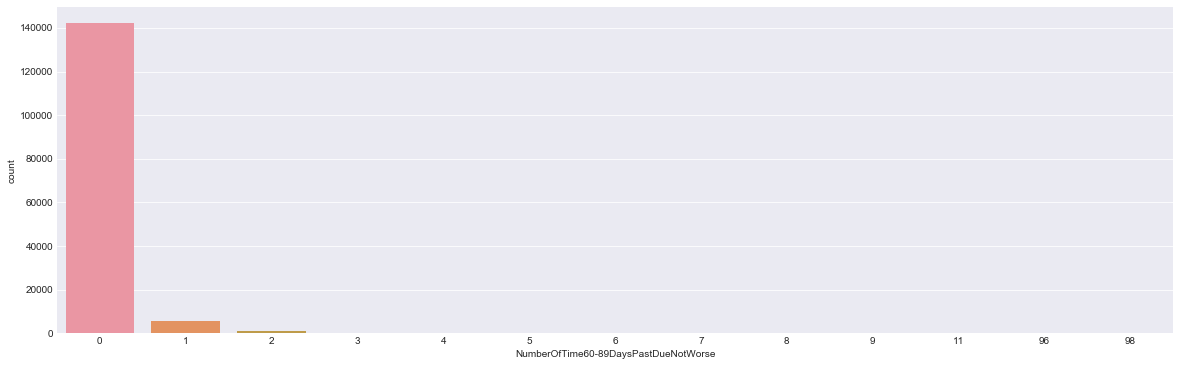

In [396]:
#NumberOfTime60-89DaysPastDueNotWorse

plt.figure(figsize=(20,6))
sns.countplot(x='NumberOfTime60-89DaysPastDueNotWorse', data=combined_data[combined_data.SeriousDlqin2yrs.notnull()])



In [397]:
combined_data.loc[combined_data.SeriousDlqin2yrs.notnull(),'NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

0     142395
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
11         1
9          1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [398]:
combined_data.loc[combined_data.SeriousDlqin2yrs.isnull(),'NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

0     96375
1      3863
2       731
3       216
98      213
4        61
5        25
7         7
6         7
9         3
96        1
8         1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

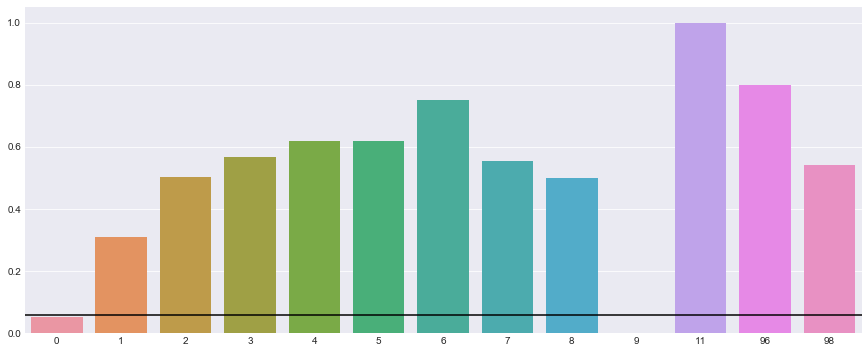

In [399]:

default_rates=list()

for num in combined_data.loc[combined_data.SeriousDlqin2yrs.notnull(),'NumberOfTime60-89DaysPastDueNotWorse'].value_counts().sort_index().index:
    
    default_rates.append(combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull())&(combined_data['NumberOfTime60-89DaysPastDueNotWorse']==num),'SeriousDlqin2yrs'].sum()/combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull())&(combined_data['NumberOfTime60-89DaysPastDueNotWorse']==num)].shape[0])
    
    
plt.figure(figsize=(15,6))
sns.barplot(combined_data.loc[combined_data.SeriousDlqin2yrs.notnull(),'NumberOfTime60-89DaysPastDueNotWorse'].value_counts().sort_index().index,default_rates)
plt.hlines(y=0.06, xmin=-1,xmax=20)

In [400]:
#the above two plots suggest two subgroups:

combined_data['60-89DaysPastDue_groups']=combined_data['NumberOfTime60-89DaysPastDueNotWorse'].apply(lambda u:0 if u==0 else 1)
combined_data['60-89DaysPastDue_groups']=combined_data['60-89DaysPastDue_groups'].astype('category')

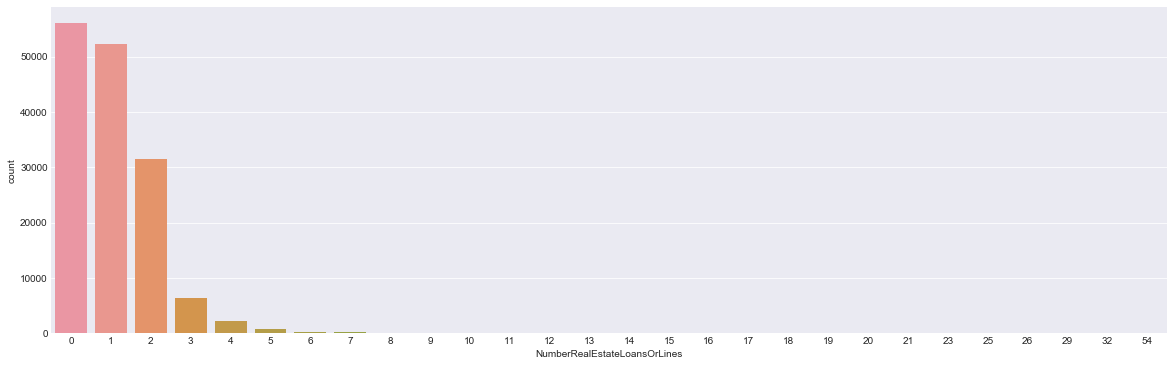

In [401]:
#NumberRealEstateLoansOrLines

plt.figure(figsize=(20,6))
sns.countplot(x='NumberRealEstateLoansOrLines', data=combined_data[combined_data.SeriousDlqin2yrs.notnull()])


In [402]:
combined_data.loc[combined_data.SeriousDlqin2yrs.notnull(),'NumberRealEstateLoansOrLines'].value_counts()

0     56188
1     52338
2     31521
3      6300
4      2170
5       689
6       320
7       171
8        93
9        78
10       37
11       23
12       18
13       15
14        7
15        7
16        4
17        4
25        3
18        2
19        2
20        2
23        2
32        1
21        1
26        1
29        1
54        1
Name: NumberRealEstateLoansOrLines, dtype: int64

In [403]:
combined_data.loc[combined_data.SeriousDlqin2yrs.isnull(),'NumberRealEstateLoansOrLines'].value_counts()

0     38066
1     35670
2     20955
3      4423
4      1414
5       452
6       227
7       108
8        58
9        49
10       23
11       19
12       11
14        9
13        5
15        4
16        2
19        2
29        1
18        1
20        1
21        1
25        1
37        1
Name: NumberRealEstateLoansOrLines, dtype: int64

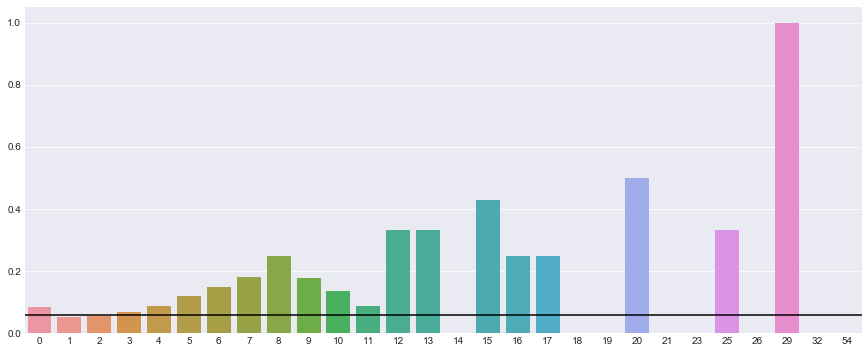

In [404]:

default_rates=list()

for num in combined_data.loc[combined_data.SeriousDlqin2yrs.notnull(),'NumberRealEstateLoansOrLines'].value_counts().sort_index().index:
    
    default_rates.append(combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull())&(combined_data['NumberRealEstateLoansOrLines']==num),'SeriousDlqin2yrs'].sum()/combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull())&(combined_data['NumberRealEstateLoansOrLines']==num)].shape[0])
    
    
plt.figure(figsize=(15,6))
sns.barplot(combined_data.loc[combined_data.SeriousDlqin2yrs.notnull(),'NumberRealEstateLoansOrLines'].value_counts().sort_index().index,default_rates)
plt.hlines(y=0.06, xmin=-1,xmax=40)

In [405]:
print(combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull()) & (combined_data.NumberRealEstateLoansOrLines==0)].sum()['SeriousDlqin2yrs']/combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull()) & (combined_data.NumberRealEstateLoansOrLines==0)].shape[0])
print(combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull()) & (combined_data.NumberRealEstateLoansOrLines>=4)].sum()['SeriousDlqin2yrs']/combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull()) & (combined_data.NumberRealEstateLoansOrLines>=4)].shape[0])
print(combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull()) & (combined_data.NumberRealEstateLoansOrLines<4)& (combined_data.NumberRealEstateLoansOrLines>0)].sum()['SeriousDlqin2yrs']/combined_data.loc[(combined_data.SeriousDlqin2yrs.notnull()) & (combined_data.NumberRealEstateLoansOrLines<4)& (combined_data.NumberRealEstateLoansOrLines>0)].shape[0])


0.08314942692389835
0.1147316538882804
0.05473663195022128


In [406]:
#the above two plots and the above density estimates suggest three subgroups:

combined_data['NumberRealEstateLoans_groups']=combined_data['NumberRealEstateLoansOrLines'].apply(lambda u:1 if u==0 else (3 if u>=4 else 2))
combined_data['NumberRealEstateLoans_groups']=combined_data['NumberRealEstateLoans_groups'].astype('category')

In [407]:
combined_data_with_dummies=pd.get_dummies(combined_data, drop_first=True)

In [408]:
combined_data_with_dummies.to_csv('ready_to_be_trained.csv')